In [1]:
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
A = pd.read_json("../Data/Stress/200VU/MI1/10W-200VU-stress-a-report3.json")
B = pd.read_json("../Data/Stress/200VU/MI1/10W-200VU-stress-b-report4.json")
C = pd.read_json("../Data/Stress/200VU/MI1/10W-200VU-stress-c-report3.json")

In [3]:
 def get_time_series(dataframe: pd.DataFrame) -> pd.Series:
    number_of_rows = len(dataframe.index)

    return pd.Series(
        name='time',
        data=[element * 10 for element in range(number_of_rows)]
    )

In [4]:
 def get_concurrency(time: pd.Series, dataframe: pd.DataFrame) -> pd.DataFrame:
    concurency = pd.concat([time, dataframe['concurrency']], axis=1)
    concurency['concurrency'] = gaussian_filter1d(sigma=0.3, input=concurency['concurrency'])
    return concurency.set_index('time')

In [5]:
time = get_time_series(A)
concurrency = get_concurrency(time, A)

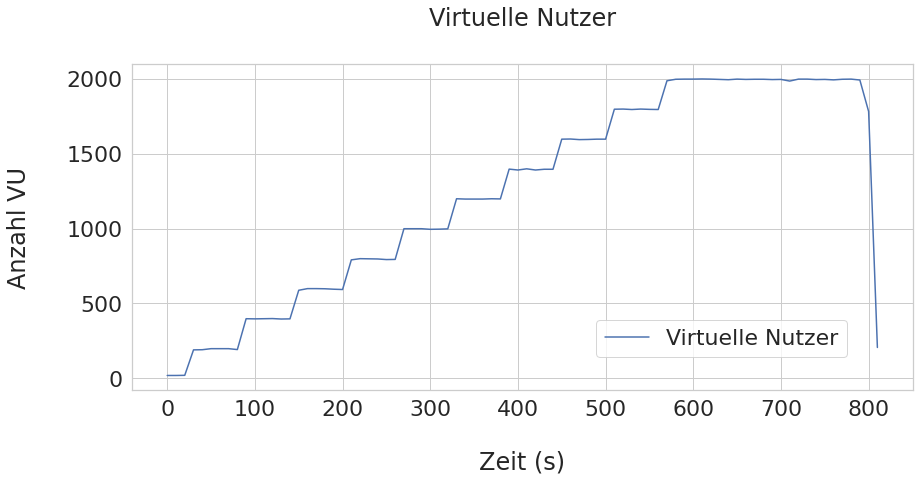

In [14]:
sb.set(font_scale=2) 
sb.set_style("whitegrid")
figure = plt.figure(figsize = (14,6))

# Plot
concurrency_plot = sb.lineplot(
    data=concurrency,
)

# Label settings
concurrency_plot.set_title('Virtuelle Nutzer', y=1.1)
concurrency_plot.set_ylabel('Anzahl VU', labelpad=35)
concurrency_plot.set_xlabel('Zeit (s)', labelpad=30)

# Legend settings.
concurrency_plot.legend(
    loc=2,
    bbox_to_anchor=(0.58, 0.25),
    labels=['Virtuelle Nutzer' ],
)

In [15]:
figure.subplots_adjust(right=0.85, top=0.85, bottom=0.20)
figure.savefig('./200VU.pdf')